In [38]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'timezone', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'ap

In [ ]:
interval = 900

In [2]:
df = pd.read_csv("./rideshare_kaggle.csv")
df = df.sort_values("timestamp")
df["datetime"] = pd.to_datetime(df.timestamp, unit="s")

In [8]:
freq_df =  df.set_index("datetime").cab_type.resample(f"{interval}s").count().to_frame()
freq_df = freq_df.rename(columns={"cab_type": "freq"})
freq_df = freq_df.reset_index()
freq_df["timestamp"] = freq_df["datetime"].apply(lambda x: x.timestamp()) + interval

In [9]:
tmp = pd.concat([df.set_index("datetime"), freq_df])
tmp = tmp.sort_values("timestamp")
tmp.freq = tmp.freq.backfill()

In [16]:
df = tmp[~tmp.destination.isna()]
df.freq = df.freq.astype(int)

In [18]:
df = df.rename(columns={"freq": f"number_of_orders_within_{int(interval/60)}_mins"})
freq_df = freq_df.rename(columns={"freq": f"number_of_orders_within_{int(interval/60)}_mins"})

In [22]:
sampled_df = df.sample(50000)
sampled_df.to_csv("sampled_rideshare.csv")

In [19]:
freq_df.to_csv("rides_slide_window.csv")

In [27]:
df["busy"] = np.where(df.number_of_orders_within_15_mins < 500, "not busy", 
                      np.where(df.number_of_orders_within_15_mins < 1000, "normal", "busy"))

In [30]:
df[["price", "busy"]].groupby("busy").price.mean()

busy
busy        16.537197
normal      16.574187
not busy    16.540966
Name: price, dtype: float64

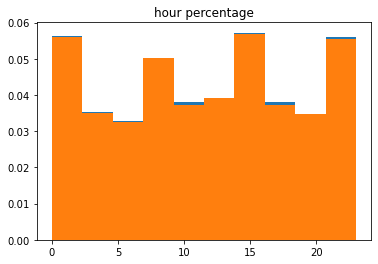

In [50]:
plt.title("hour percentage")
plt.hist(df.hour, density=True)
plt.hist(sampled_df.hour, density=True)
plt.savefig("hour_percentage.jpg")

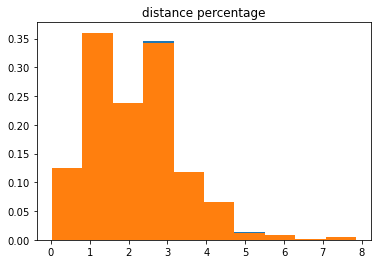

In [54]:
plt.title("distance percentage")
plt.hist(df.distance, density=True)
plt.hist(sampled_df.distance, density=True)
plt.savefig("distance_percentage.jpg")

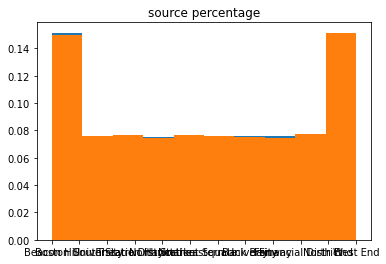

In [55]:
plt.title("source percentage")
plt.hist(df.source, density=True)
plt.hist(sampled_df.source, density=True)
plt.savefig("source_percentage.jpg")

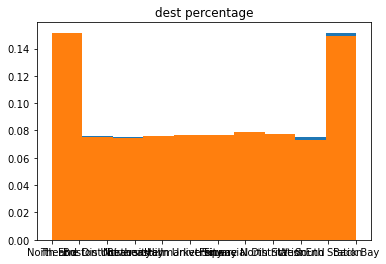

In [56]:
plt.title("dest percentage")
plt.hist(df.destination, density=True)
plt.hist(sampled_df.destination, density=True)
plt.savefig("dest_percentage.jpg")

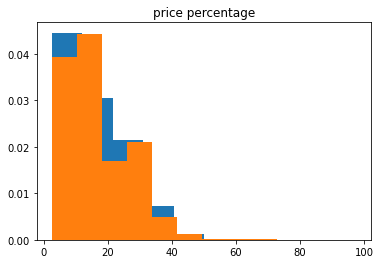

In [49]:
plt.title("price percentage")
plt.hist(df.price, density=True)
plt.hist(sampled_df.price, density=True)
plt.savefig("price_percentage.jpg")

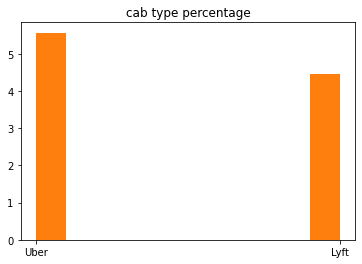

In [53]:
plt.title("cab type percentage")
plt.hist(df.cab_type, density=True)
plt.hist(sampled_df.cab_type, density=True)
plt.savefig("cab_type_percentage.jpg")

<AxesSubplot:>

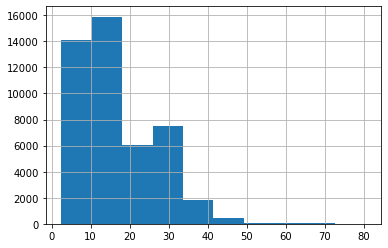